<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/chapter2/chapter2_workaround_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [209]:
class Perceptron:
  def __init__(self, eta = 0.01, n_iter = 500, random_state = 1, scale = 0.01):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    self.scale_ = scale

  def fit(self, X, y):
    rng = np.random.default_rng(self.random_state)
    self.w_ = rng.normal(loc = 0.0, scale = self.scale_, size = X.shape[1])
    self.b_ = np.float_(0)
    self.errors_ = []

    for _ in range(self.n_iter):
      error = 0
      for xi, target in zip(X,y):
        update = self.eta*(target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        error += (int) (update != 0.0)
      self.errors_.append(error)
      if(error <=0 ):
        break
    return self

  def net_input(self,X):
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    return np.where( self.net_input(X) >= 0.0, 1,0)

In [210]:
perceptron = Perceptron()

In [211]:
x = np.array([[1,1],[2,2]])
y = np.array([1,0])
perceptron.fit(x,y)
perceptron.w_

array([-0.00654416, -0.00178382])

In [212]:
print(perceptron.errors_)

[1, 1, 2, 1, 0]


# decision line 그려보기

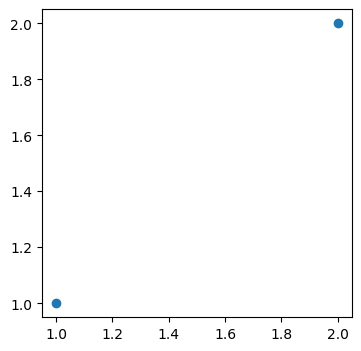

In [213]:
# set the figure size
fig, ax = plt.subplots(figsize=(4,4))

# 간단하게 x 를 class 구분없이 출력해보자
ax.scatter(x[:,0],x[:,1])
plt.show()

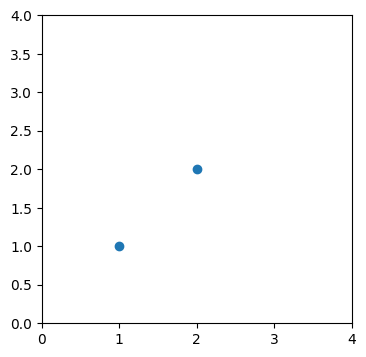

In [214]:
# 뭔가 비율이 별로니까, x와 y의 최대 최소 범위를 바꿔보자
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x[:,0],x[:,1])
plt.xlim(0,4)
plt.ylim(0,4)

plt.show()

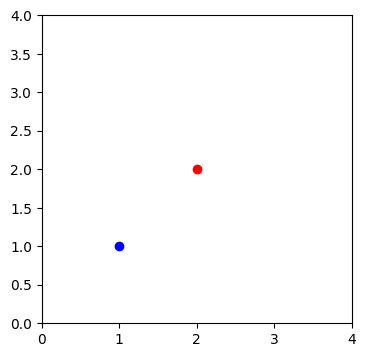

In [215]:
# 이제 각 data포인트를 category에 따라 다른 색상을 입혀보자
# 이때 pivot이 데이터포인트가 아니라 색상으로 보고 진행하면 한결 수월해진다.

# set figure size and color
fig, ax = plt.subplots( figsize = (4,4))
colors = ['r','b']

# 방금처럼 똑같이 x y 범위를 설정해주고
plt.xlim(0,4)
plt.ylim(0,4)

# 이제 각 class마다 출력을해보자
for c in np.unique(y):
   # 우리는 fancy indexing 을 활용할거다
   mask = (y == c) # y에서 c 와 같은 행은 1로, 나머지는 0으로 마킹한다
   ax.scatter(x[mask,0], x[mask,1], color = colors[c], label = f'class {c}')

plt.show()



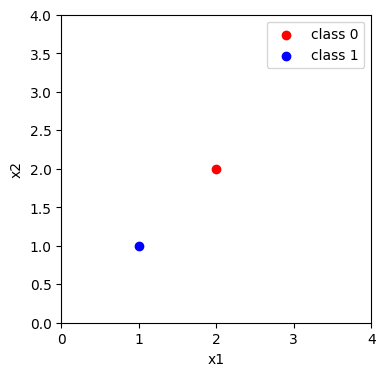

In [217]:
# 좋다 이제 범례도 추가해보고 각 축이 어떤걸 나타내는지도 적어보자

fig, ax = plt.subplots( figsize = (4,4))
colors = ['r','b']

plt.xlim(0,4)
plt.ylim(0,4)

for c in np.unique(y):
   mask = (y == c) # y에서 c 와 같은 행은 1로, 나머지는 0으로 마킹한다
   ax.scatter(x[mask,0], x[mask,1], color = colors[c], label = f'class {c}')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc = 'upper right')

plt.show()



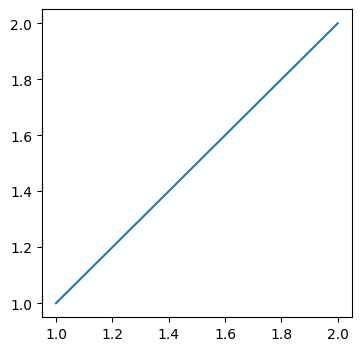

In [218]:
# 이제 decision line을 그려볼거다
# decision line은 scatter plot이 아닌, 그냥 ax.plot을 써서 그릴 수 있다
# 예시로 간단하게 첫번쨰 데이터포인트와 두번째 데이터포인트를 잇는 직선을 그려보자

fig,ax = plt.subplots(figsize = (4,4))
ax.plot(x[:,0],x[:,1])
plt.show()

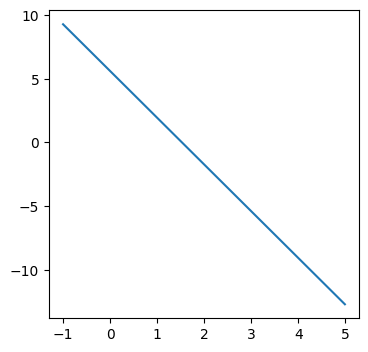

In [219]:
# 좋다 이제 perceptron.w_에 해당하는 decision dline을 어떻게 그릴지 고민해보자
# HINT : decision line은 wx+b = 0에 해당한다.
# set resolution
fig, ax = plt.subplots(figsize = (4,4))
resolution = 1/100
decision_x = np.arange(0.0 - 1, 4.0 + 1, resolution)
decision_y = -(perceptron.b_ + perceptron.w_[0]*decision_x) / perceptron.w_[1]
ax.plot( decision_x, decision_y , label = 'Decision Boundary')
plt.show()

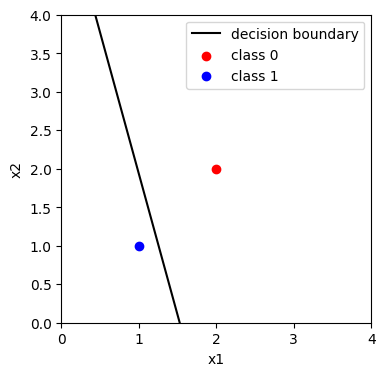

In [220]:
# 이제 두 코드를 합쳐보자

fig, ax = plt.subplots( figsize = (4,4))
colors = ['r','b']

plt.xlim(0.0, 4.0)
plt.ylim(0.0, 4.0)

# w_normalized = perceptron.w_ / np.linalg.norm(perceptron.w_)
w_normalized = perceptron.w_

decision_x = np.array([np.min(x[:,0]) - 1, np.max(x[:,0]) + 1])
decision_y = (-perceptron.b_ - decision_x*w_normalized[0])/ w_normalized[1]
ax.plot(decision_x, decision_y, color = 'black', label = f'decision boundary')

for c in np.unique(y):
  mask = (y == c)
  ax.scatter( x[mask,0], x[mask,1], color = colors[c], label = f'class {c}')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc = 'upper right')

plt.show()

## LAB

맨 처음 w를 어떻게 initialize 하냐에 따라서, 각기 다른 decision line을 볼 수 있다.  
어떠한 decision line 이 좋은 decision line인지, 또 어째서 그런 결과들이 나오는지 고민해보자

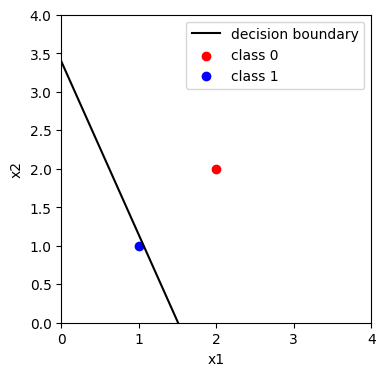

In [228]:
# lab을 진행하기 앞서 도움이 될만한 함수들을 먼저 정의해보자
x = np.array([[1,1],[2,2]])
y = np.array([1,0])

def get_decision_line(perceptron, x):
  w_normalized = perceptron.w_
  b = perceptron.b_
  decision_x = np.array([np.min(x[:,0])-1, np.max(x[:,1]) + 1])
  decision_y = -(b + decision_x * w_normalized[0]) / w_normalized[1]
  return decision_x, decision_y

def draw_scatters(x,y,colors,ax):
  for c in np.unique(y):
    mask = (y == c)
    ax.scatter( x[mask,0], x[mask,1], color = colors[c], label = f'class {c}')

def draw_decision_line(perceptron,x,y):
  """ decision line 그리기
  peceptron 이 이미 훈련되어 있고,
  input이 x, class가 y 인 데이터가 주어졌을때
  decision boundary 를 그린다. (perceptron 이므로 line으로 정의했다)
  """
  fig, ax = plt.subplots( figsize = (4,4))
  colors = ['r','b']

  plt.xlim(0.0, 4.0)
  plt.ylim(0.0, 4.0)

  decision_x, decision_y = get_decision_line(perceptron,x)
  ax.plot(decision_x, decision_y, color = 'black', label = f'decision boundary')

  draw_scatters(x,y,colors,ax)

  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.legend(loc = 'upper right')

  plt.show()

draw_decision_line(perceptron, x , y)

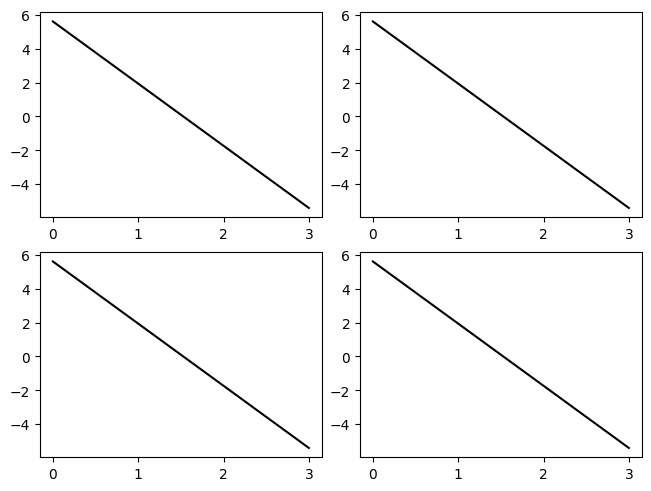

In [222]:
# 한눈에 쉬운 비교를 위해, 한번에 여러개의 plot을 출력하는 법을 알아보자
# 원리를 이해하면 쉽다

# 가로 2, 세로 2의 figure를 그린다 치면,
fig, axs = plt.subplots( 2, 2, layout = 'constrained')

# 예전에 하나의 plot만 그릴때는 ax.scatter 같은 형식으로 그릴 plot을 설정해줬다면,
# 이제는 그리고싶은 plot의 위치를 indexing형식으로 지정하고 그릴 plot을 설정해주면 된다
# 예를 들어,
axs[0,0].plot(decision_x,decision_y, color = 'black', label = f'decision boundary 1')
axs[0,1].plot(decision_x,decision_y, color = 'black', label = f'decision boundary 2')
axs[1,0].plot(decision_x,decision_y, color = 'black', label = f'decision boundary 3')
axs[1,1].plot(decision_x,decision_y, color = 'black', label = f'decision boundary 4')

plt.show()

## Dataset
데이터셋을 무작위로 생성하려 했는데,
퍼셉트론은 두 개의 클래스가 선형적으로 '초평면'으로 구분될 수 있을때에만 수렴하므로, 비교적 수렴가능성이 높은 iris 데이터셋을 가지고 이 lab을 진행하는게 더 낫겠다는 생각이 듬

우선은 직접 만들어본 데이터셋을 가지고 한번 실험해보자

[-0.70227595  0.69509844]


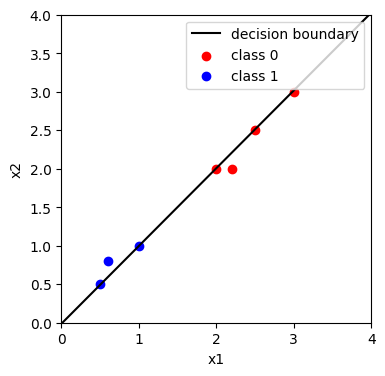

In [254]:
x = np.array([[1,1],
              [0.5,0.5],
              [2,2],
              [3,3],
              [2.5,2.5],
              [0.6,0.8],
              [2.2,2.0]
              ])
y = np.array([1,1,0, 0, 0, 1, 0])
perceptron = Perceptron(scale = 2.78)
perceptron.fit(x,y)
print(perceptron.w_)

draw_decision_line(perceptron,x,y)

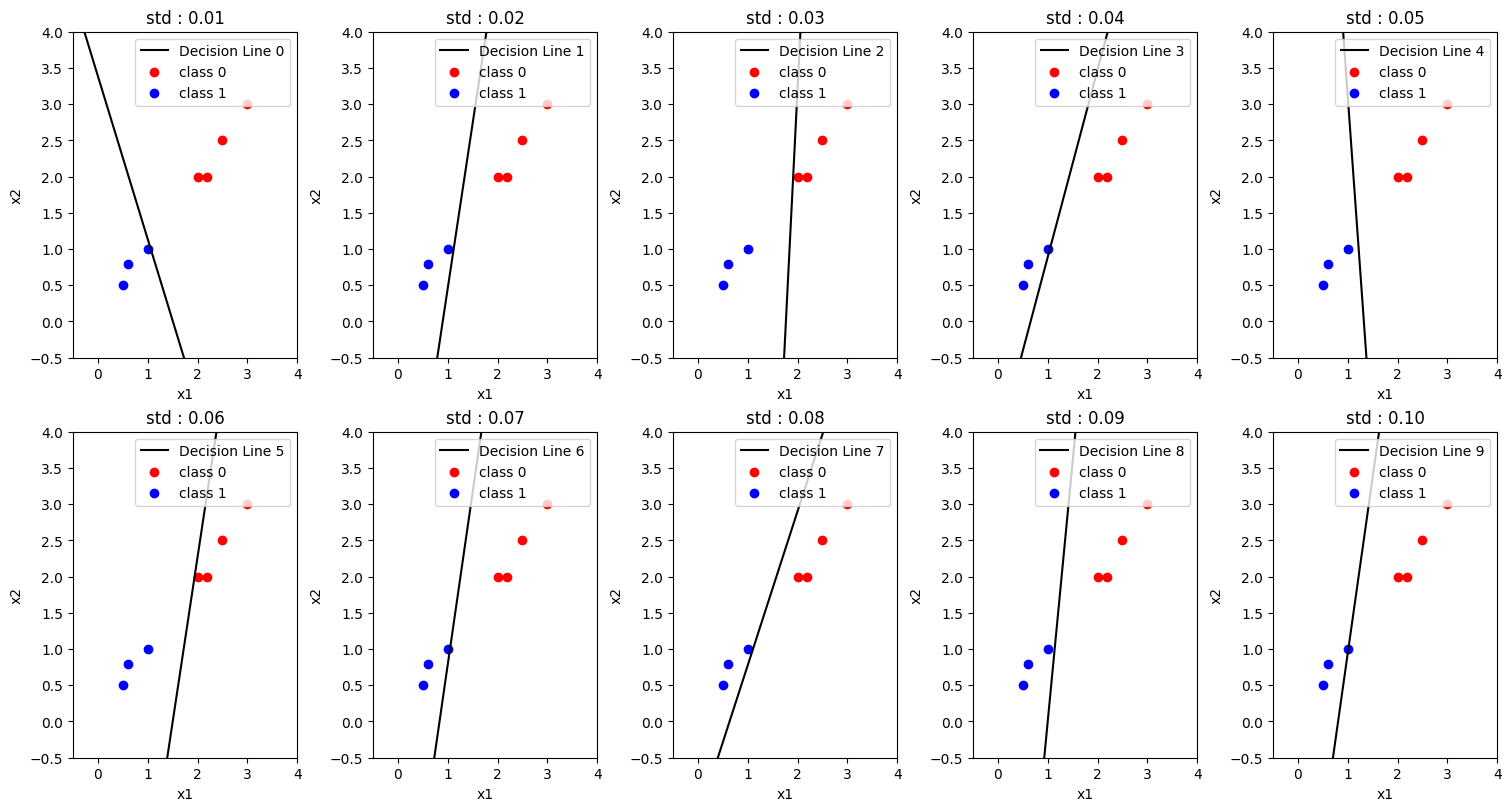

In [255]:
# 이제 여러 scale을 가지고 비교를 해보자
# TODO : iris데이터셋가지고 풀기
num_r = 2
num_c = 5
fig, axs = plt.subplots( num_r, num_c, layout = 'constrained', figsize = (15,8))
perceptron = Perceptron()
# set minimum and maximum value of training datast for convenience
min_x1, max_x1 = 0 , 10
min_x2, max_x2 = 0 , 6
rng = np.random.default_rng(123)
# scales = np.random.uniform(0.01, 0.20, num_r*num_c)
# scales = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
scales = np.array(np.arange(0.01, 0.11, 0.01))
colors = ['r','b']
x = np.array([[1,1],
              [0.5,0.5],
              [2,2],
              [3,3],
              [2.5,2.5],
              [0.6,0.8],
              [2.2,2.0]
              ])
y = np.array([1,1,0, 0, 0, 1, 0])
for r in range(num_r):
  for c in range(num_c):
    scale = scales[ r*num_c + c]
    perceptron = Perceptron(scale = scale)
    perceptron.fit(x,y)

    axs[r,c].set_xlim( np.min(x[:,0]) - 1, np.max(x[:,0]) + 1 )
    axs[r,c].set_ylim( np.min(x[:,1]) - 1, np.max(x[:,1]) + 1 )

    #draw decision boundary
    d_x , d_y = get_decision_line(perceptron, x)
    axs[r,c].plot(d_x,d_y, color = 'black', label = f'Decision Line {r*num_c + c}')

    #draw category
    for class_label in np.unique(y):
      mask = (y == class_label)
      axs[r,c].scatter(x[mask,0],x[mask,1], color = colors[class_label], label = f'class {class_label}')

    axs[r,c].set_xlabel('x1')
    axs[r,c].set_ylabel('x2')
    axs[r,c].set_title(f'std : {scale:.2f}')
    axs[r,c].legend(loc = 'upper right')

plt.show()